## Smoke drink predictor

- Sex	male, female	
- age	round up to 5 years	
- height	round up to 5 cm[cm]
- weight	[kg]	
- sight_left	eyesight(left)	
- sight_right	eyesight(right)	
- hear_left	hearing left, 1(normal), 2(abnormal
- hear_right	hearing right, 1(normal), 2(abnormal)
- SBP	Systolic blood pressure[mmHg]
- DBP	Diastolic blood pressure[mmHg]
- BLDS	BLDS or FSG(fasting blood glucose)[mg/dL]
- tot_chole	total cholesterol[mg/dL]
- HDL_chole	HDL cholesterol[mg/dL]	HDL 
- LDL_chole	LDL cholesterol[mg/dL]	LDL 
- triglyceride	triglyceride[mg/dL]
- hemoglobin	hemoglobin[g/dL
- urine_protein	protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4
- serum_creatinine	serum(blood) creatinine[mg/dL]	
- SGOT_AST	SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]	
- SGOT_ALT	ALT(Alanine transaminase)[IU/L]	
- gamma_GTP	y-glutamyl transpeptidase[IU/L]	]
- SMK_stat_type_cd	Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke
- DRK_YN	Drinker or Not	

### IMPORTING PACKAGES

In [335]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA OVERVIEWS

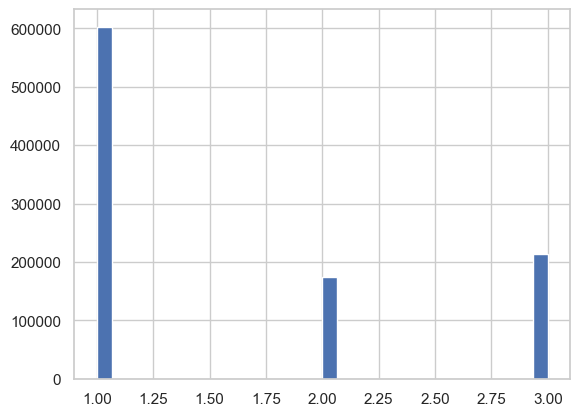

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N


In [336]:
data = pd.read_csv('smoking_driking.csv')
plt.hist(data['SMK_stat_type_cd'] , bins=30)

plt.show()
data.head(2)

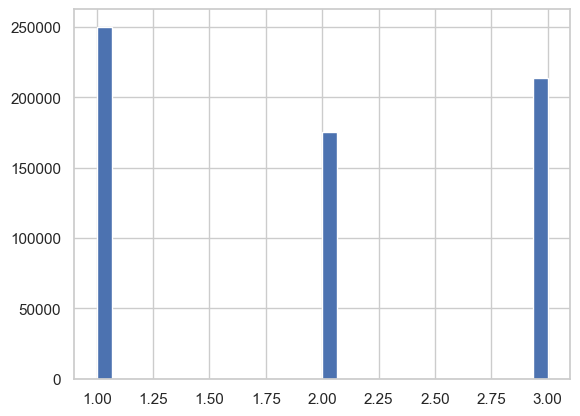

data :  (638905, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638905 entries, 0 to 638904
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               638905 non-null  object 
 1   age               638905 non-null  int64  
 2   height            638905 non-null  int64  
 3   weight            638905 non-null  int64  
 4   waistline         638905 non-null  float64
 5   sight_left        638905 non-null  float64
 6   sight_right       638905 non-null  float64
 7   hear_left         638905 non-null  float64
 8   hear_right        638905 non-null  float64
 9   SBP               638905 non-null  float64
 10  DBP               638905 non-null  float64
 11  BLDS              638905 non-null  float64
 12  tot_chole         638905 non-null  float64
 13  HDL_chole         638905 non-null  float64
 14  LDL_chole         638905 non-null  float64
 15  triglyceride      638905 non-null  float64
 16 

In [337]:
n = 250000

df_1 = data[data['SMK_stat_type_cd'] == 1].sample(n )
df_2 = data[data['SMK_stat_type_cd'] == 2]
df_3 = data[data['SMK_stat_type_cd'] == 3]

data = pd.concat([df_1, df_2, df_3] , axis=0).reset_index(drop=True)

plt.hist(data['SMK_stat_type_cd'] , bins=30)

plt.show()

print('data : ' ,data.shape)
data.info()

In [338]:
data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,...,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000,638905.000000
mean,47.136006,164.269469,65.484000,82.466251,0.998758,0.996722,1.030807,1.029515,123.116451,76.678963,...,55.647761,112.849560,141.630929,14.556273,1.098052,0.891717,26.732176,27.398515,42.497024,1.943582
std,13.786376,8.971321,12.586181,11.195089,0.601177,0.603416,0.172796,0.169244,14.292301,9.887203,...,14.995320,35.593422,111.449612,1.543238,0.448228,0.447966,26.419711,28.556243,56.570413,0.850287
min,20.000000,130.000000,25.000000,32.000000,0.100000,0.100000,1.000000,1.000000,70.000000,34.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,113.000000,70.000000,...,45.000000,89.000000,78.000000,13.500000,1.000000,0.700000,19.000000,15.000000,17.000000,1.000000
50%,45.000000,165.000000,65.000000,82.500000,1.000000,1.000000,1.000000,1.000000,122.000000,77.000000,...,54.000000,111.000000,114.000000,14.700000,1.000000,0.900000,23.000000,21.000000,27.000000,2.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,132.000000,82.000000,...,64.000000,135.000000,170.000000,15.700000,1.000000,1.000000,29.000000,32.000000,46.000000,3.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,255.000000,181.000000,...,1206.000000,2254.000000,6430.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [339]:
columns = data.columns
columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [340]:
data.describe(include=['O'])

,sex,DRK_YN
count,638905,638905
unique,2,2
top,Male,Y
freq,430105,370573


In [341]:
columns_with_missing_values = data.columns[data.isnull().sum() > 0]
print(columns_with_missing_values)

Index([], dtype='object')


In [342]:
sex_mapping = {'Male': 1, 'Female': 0} 
data['sex'] = data['sex'].map(sex_mapping)

drk_mapping = {'Y': 1, 'N': 0} 
data['DRK_YN'] = data['DRK_YN'].map(drk_mapping)

In [343]:
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,55,160,50,75.0,0.8,0.7,1.0,1.0,121.0,...,160.0,100.0,14.1,1.0,0.6,15.0,17.0,25.0,1.0,0
1,0,55,145,40,69.0,1.2,0.8,1.0,1.0,110.0,...,104.0,140.0,14.3,1.0,0.6,23.0,19.0,17.0,1.0,0
2,0,55,160,60,76.5,1.2,1.0,1.0,1.0,108.0,...,168.0,73.0,12.8,1.0,0.9,23.0,20.0,20.0,1.0,0
3,0,30,165,55,68.0,1.0,1.0,1.0,1.0,117.0,...,142.0,80.0,12.9,1.0,0.6,16.0,10.0,7.0,1.0,0
4,1,70,165,50,71.0,0.4,0.5,1.0,2.0,134.0,...,95.0,120.0,14.3,1.0,1.0,16.0,9.0,16.0,1.0,1


In [344]:
is_smoking= data['SMK_stat_type_cd']
print(is_smoking.head())

is_drinking = data['DRK_YN']
print(is_drinking.head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64
0    0
1    0
2    0
3    0
4    1
Name: DRK_YN, dtype: int64


In [345]:
current_y_is_smoking_or_drinking = 'SMK_stat_type_cd'
# current_y_is_smoking_or_drinking = 'DRK_YN'

### Categorical Variable Analysis

Plotting 1...


Plotting 2...
Plotting 3...
Plotting 4...
Plotting 5...
Plotting 6...
Plotting 7...
Plotting 8...
Plotting 9...
Plotting 10...
Plotting 11...


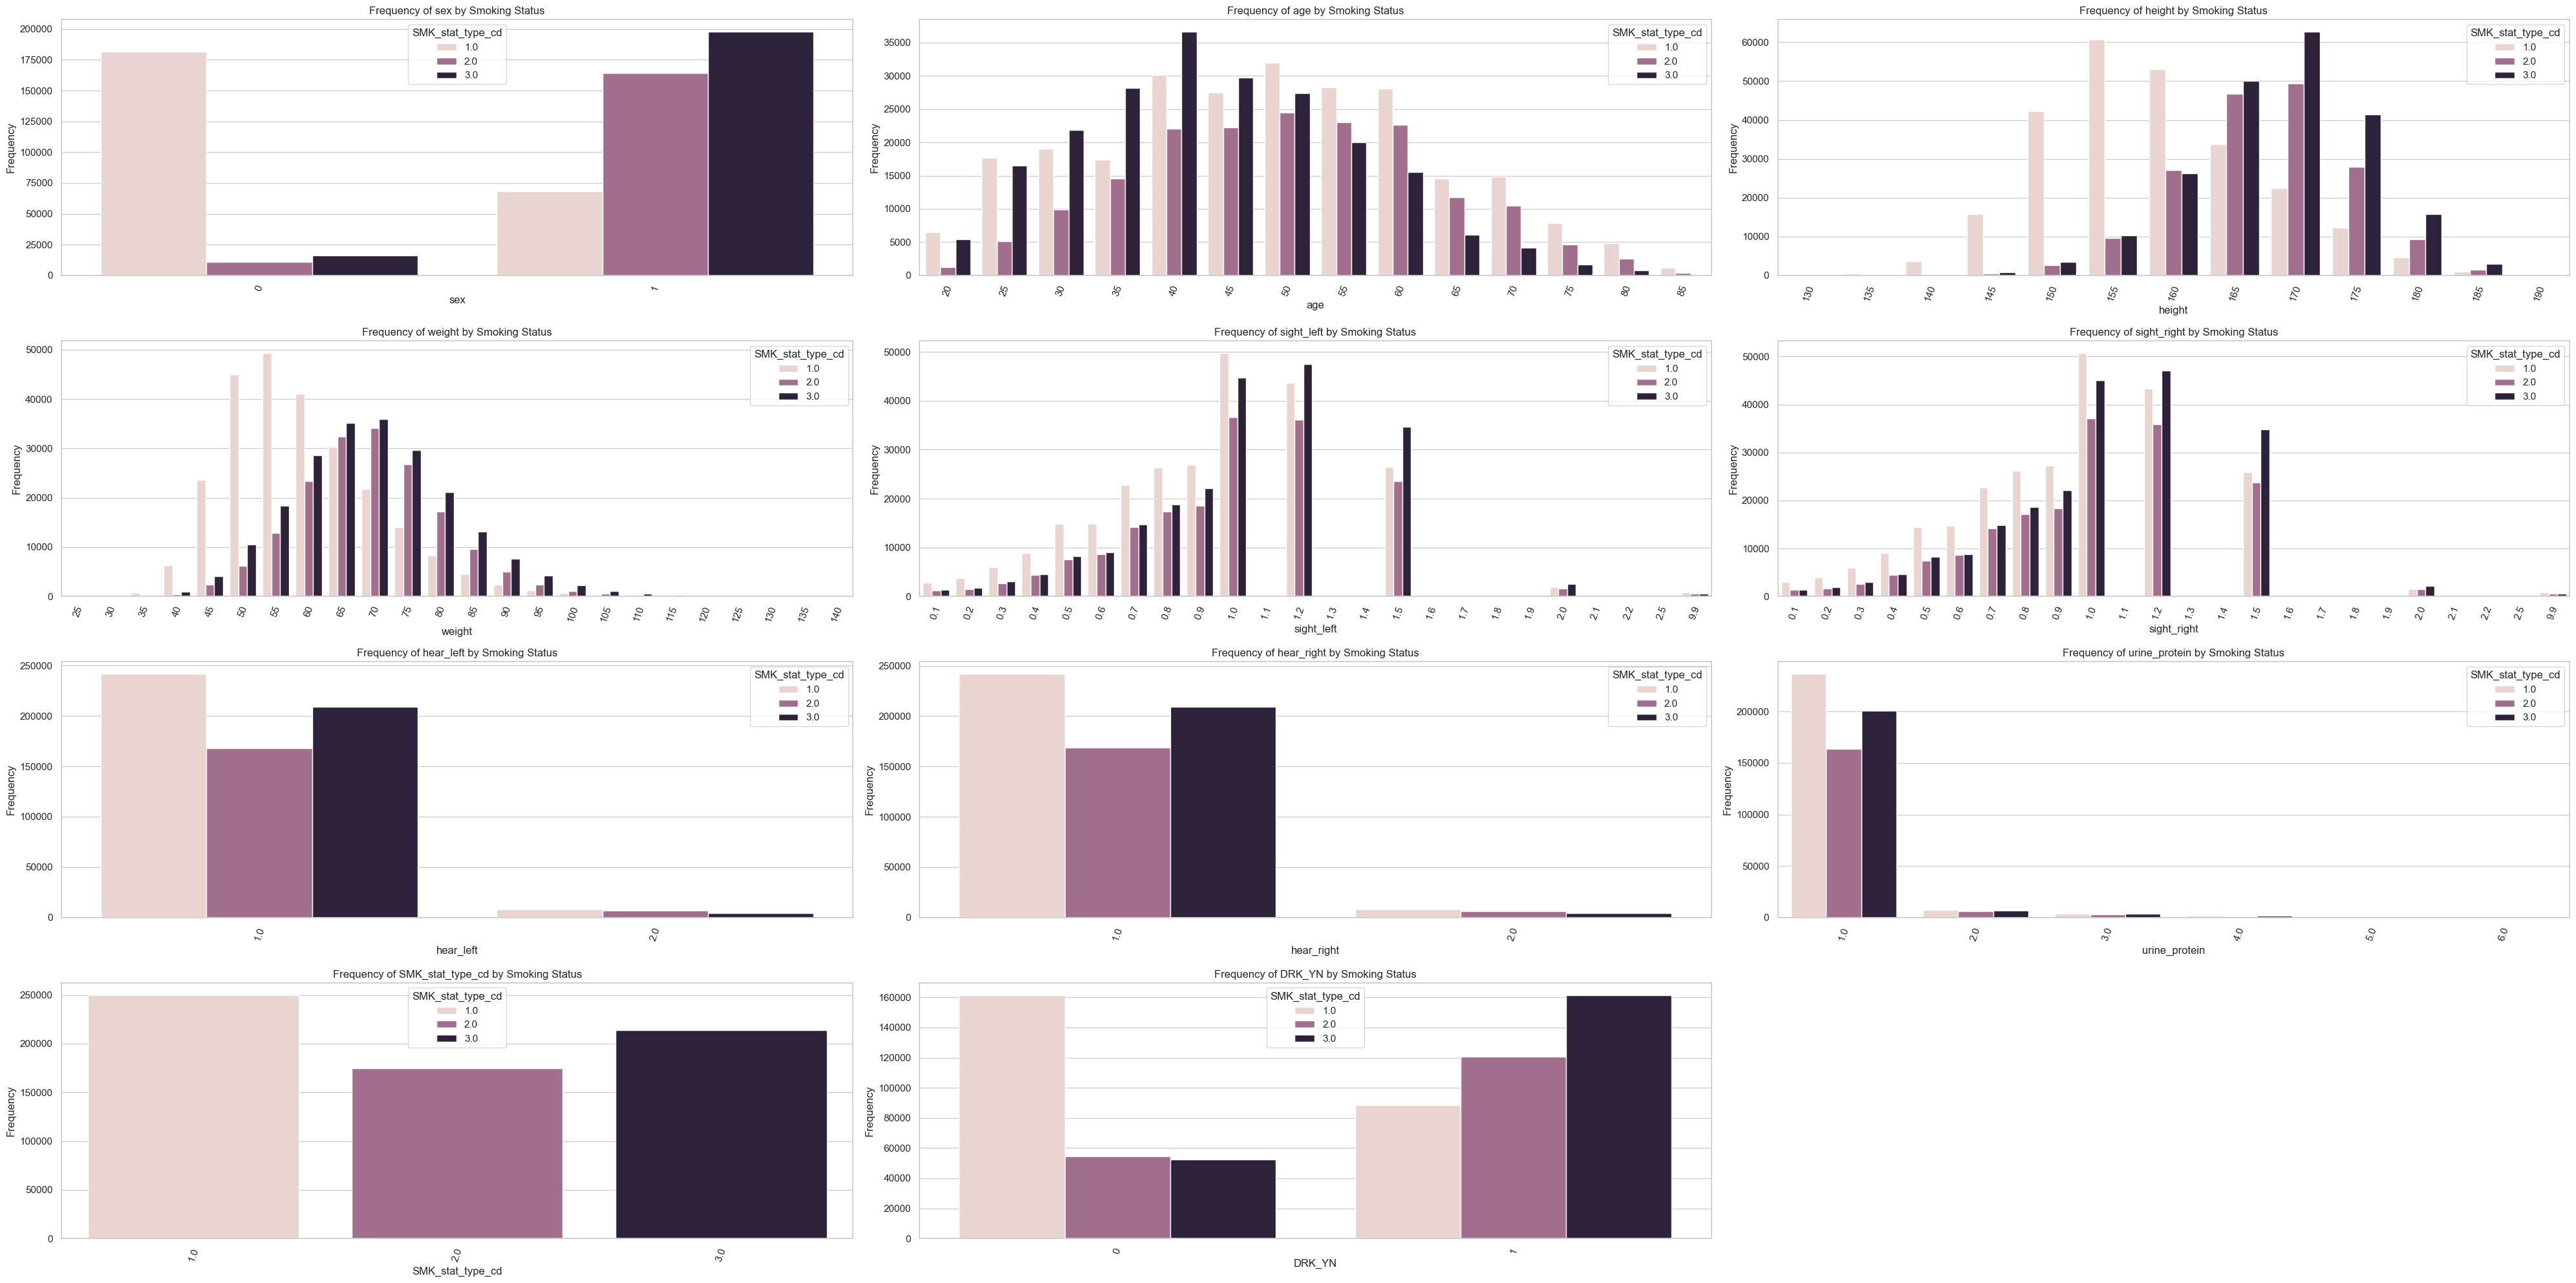

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
                              "urine_protein", current_y_is_smoking_or_drinking, "DRK_YN"], start=1):

    print(f'Plotting {idx}...')

    plt.subplot(4, 3, idx)

    sns.countplot(x=column, data=data , hue=current_y_is_smoking_or_drinking)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

In [347]:
categorical_features = ['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
                              "urine_protein"]
numerical_features = [col for col in data.columns if col not in categorical_features]

### Boxplot and removing outlier

In [348]:
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,55,160,50,75.0,0.8,0.7,1.0,1.0,121.0,...,160.0,100.0,14.1,1.0,0.6,15.0,17.0,25.0,1.0,0
1,0,55,145,40,69.0,1.2,0.8,1.0,1.0,110.0,...,104.0,140.0,14.3,1.0,0.6,23.0,19.0,17.0,1.0,0
2,0,55,160,60,76.5,1.2,1.0,1.0,1.0,108.0,...,168.0,73.0,12.8,1.0,0.9,23.0,20.0,20.0,1.0,0
3,0,30,165,55,68.0,1.0,1.0,1.0,1.0,117.0,...,142.0,80.0,12.9,1.0,0.6,16.0,10.0,7.0,1.0,0
4,1,70,165,50,71.0,0.4,0.5,1.0,2.0,134.0,...,95.0,120.0,14.3,1.0,1.0,16.0,9.0,16.0,1.0,1


In [349]:
is_smoking.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64

In [350]:
is_drinking.head()

0    0
1    0
2    0
3    0
4    1
Name: DRK_YN, dtype: int64

In [351]:
data.shape

(638905, 24)

#### ANALYZING,  'sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right'

Plotting 1...
Number of unique values :  2
Plotting 2...
Number of unique values :  14


Plotting 3...
Number of unique values :  13
Plotting 4...
Number of unique values :  24
Plotting 5...
Number of unique values :  24
Plotting 6...
Number of unique values :  24
Plotting 7...
Number of unique values :  2
Plotting 8...
Number of unique values :  2


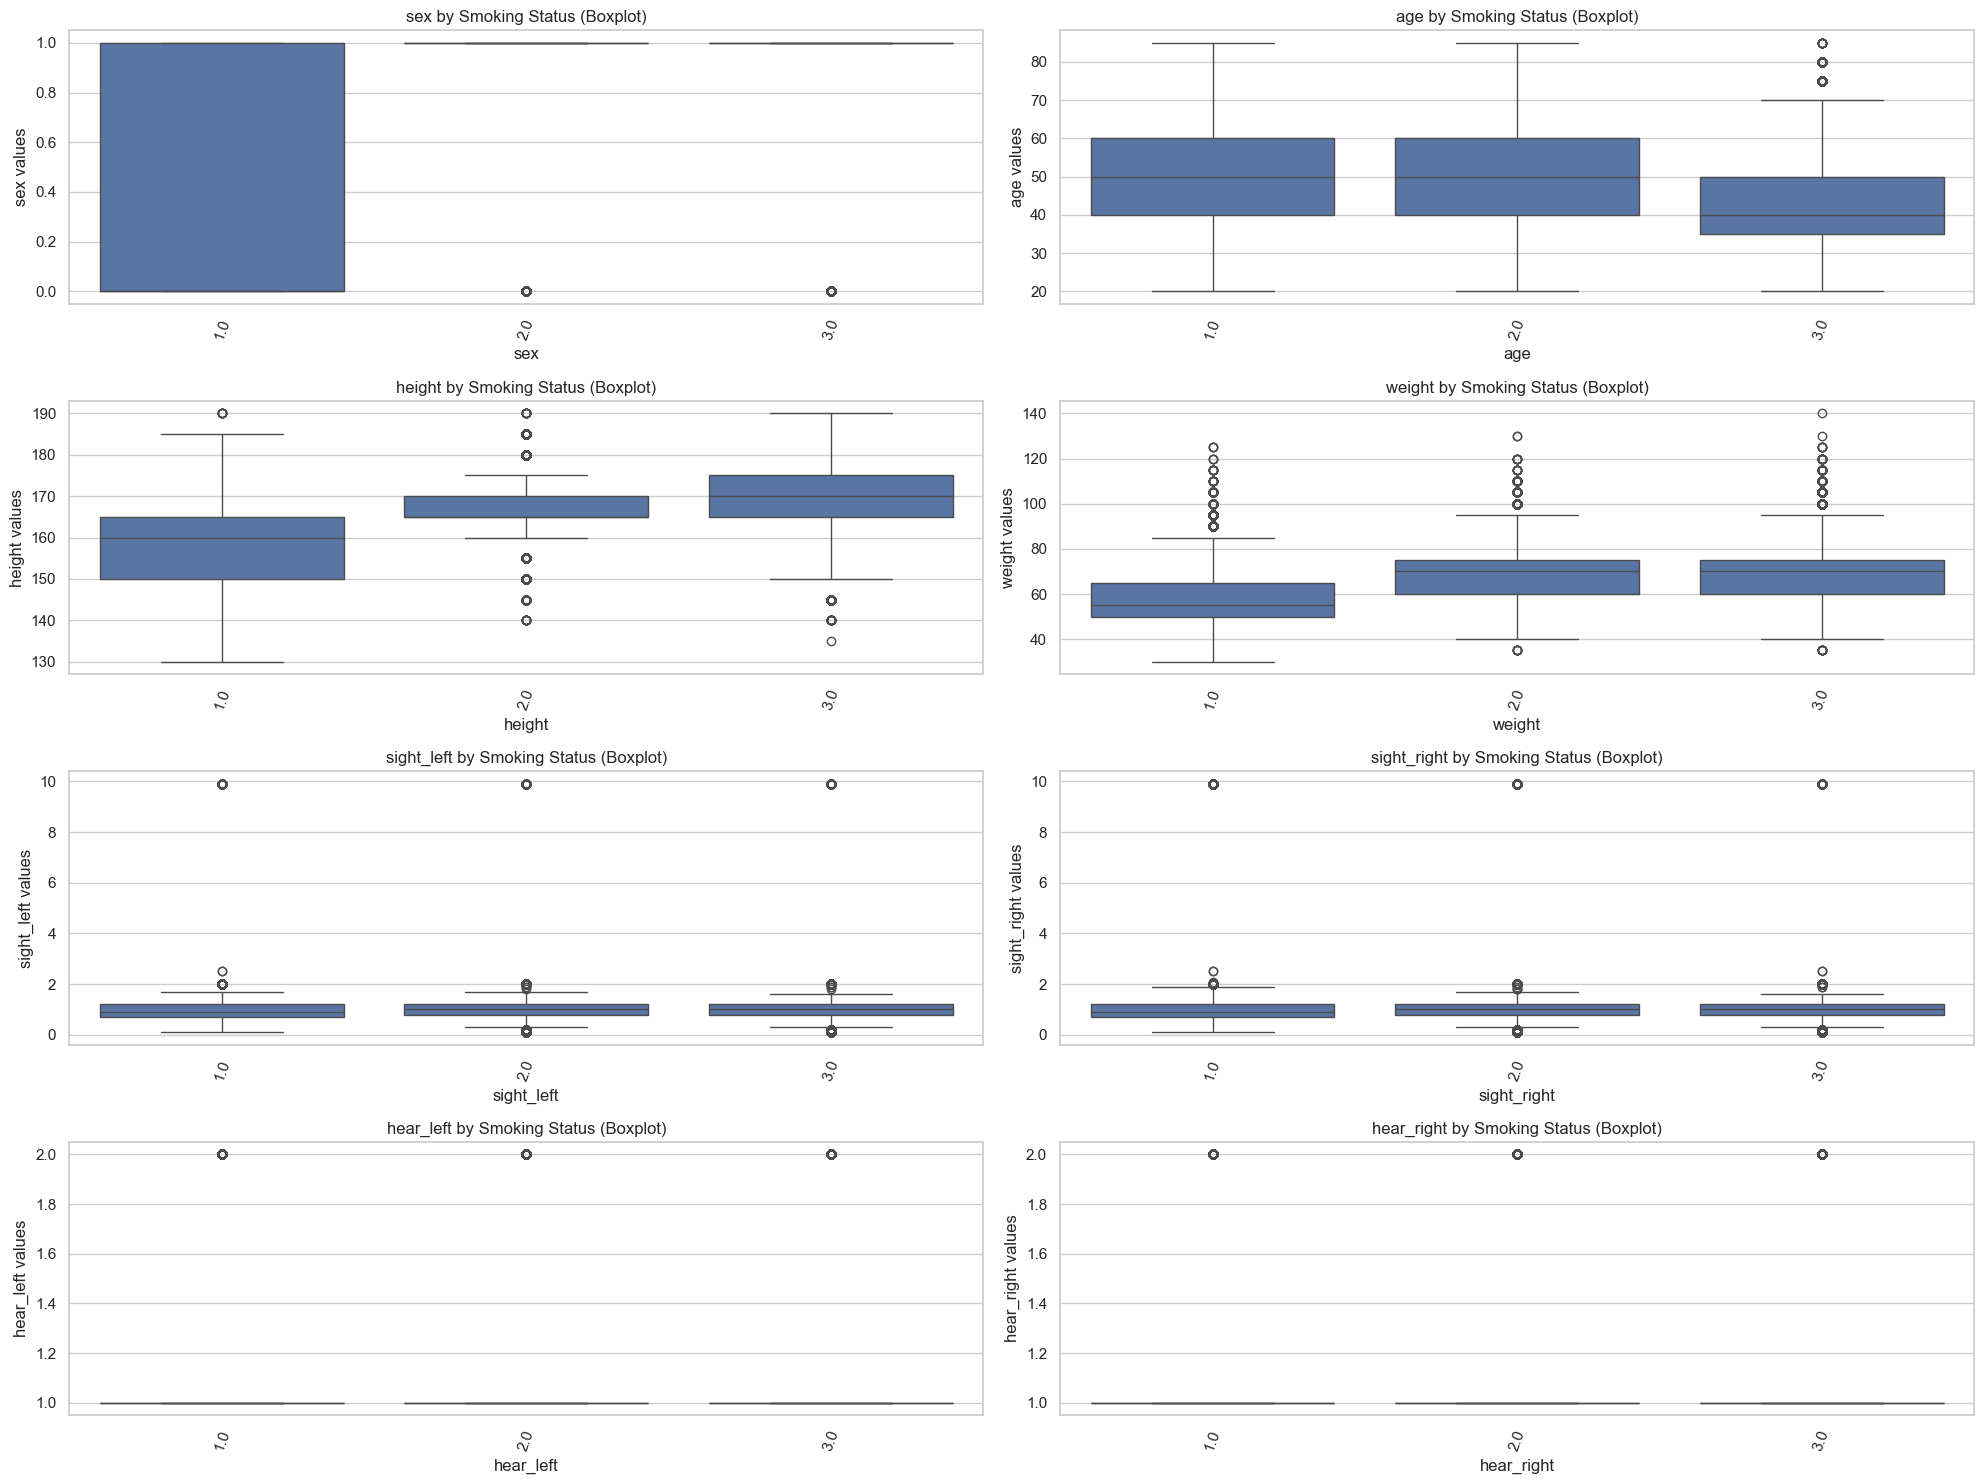

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'sight_left',
                              'sight_right', 'hear_left', 'hear_right'], start=1):
    print(f'Plotting {idx}...')
    print("Number of unique values : ",len(data[column].unique()))

    plt.subplot(4, 2, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel(f'{column} values')
    plt.title(f'{column} by Smoking Status (Boxplot)')

plt.tight_layout()
plt.show()

Some Observations from above graphs:
* (hear_left , hear_right) ---> categorical value 1 is dominated for all classes(1,2,3)
    * Hence, there is almost no variability of these features with target_class
    * So, we can drop these columns safely

In [353]:
data.drop(['hear_left', 'hear_right'], axis=1, inplace=True)

#### ANALYZING, 'waistline' 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'

Plotting 1...
Number of item greater than 0.999 percentile: 115.0
Number of values greater than 115.0 in DBP: 611
Number of rows removed: 611
Number of unique values :  622
Plotting 2...
Number of item greater than 0.999 percentile: 184.0
Number of values greater than 184.0 in DBP: 630
Number of rows removed: 630
Number of unique values :  114
Plotting 3...
Number of item greater than 0.999 percentile: 117.0
Number of values greater than 117.0 in DBP: 607
Number of rows removed: 607
Number of unique values :  83
Plotting 4...
Number of item greater than 0.999 percentile: 329.0
Number of values greater than 329.0 in DBP: 626
Number of rows removed: 626
Number of unique values :  294
Plotting 5...
Number of item greater than 0.999 percentile: 351.0
Number of values greater than 351.0 in DBP: 634
Number of rows removed: 634
Number of unique values :  293
Plotting 6...
Number of item greater than 0.999 percentile: 120.0
Number of values greater than 120.0 in DBP: 604
Number of rows removed

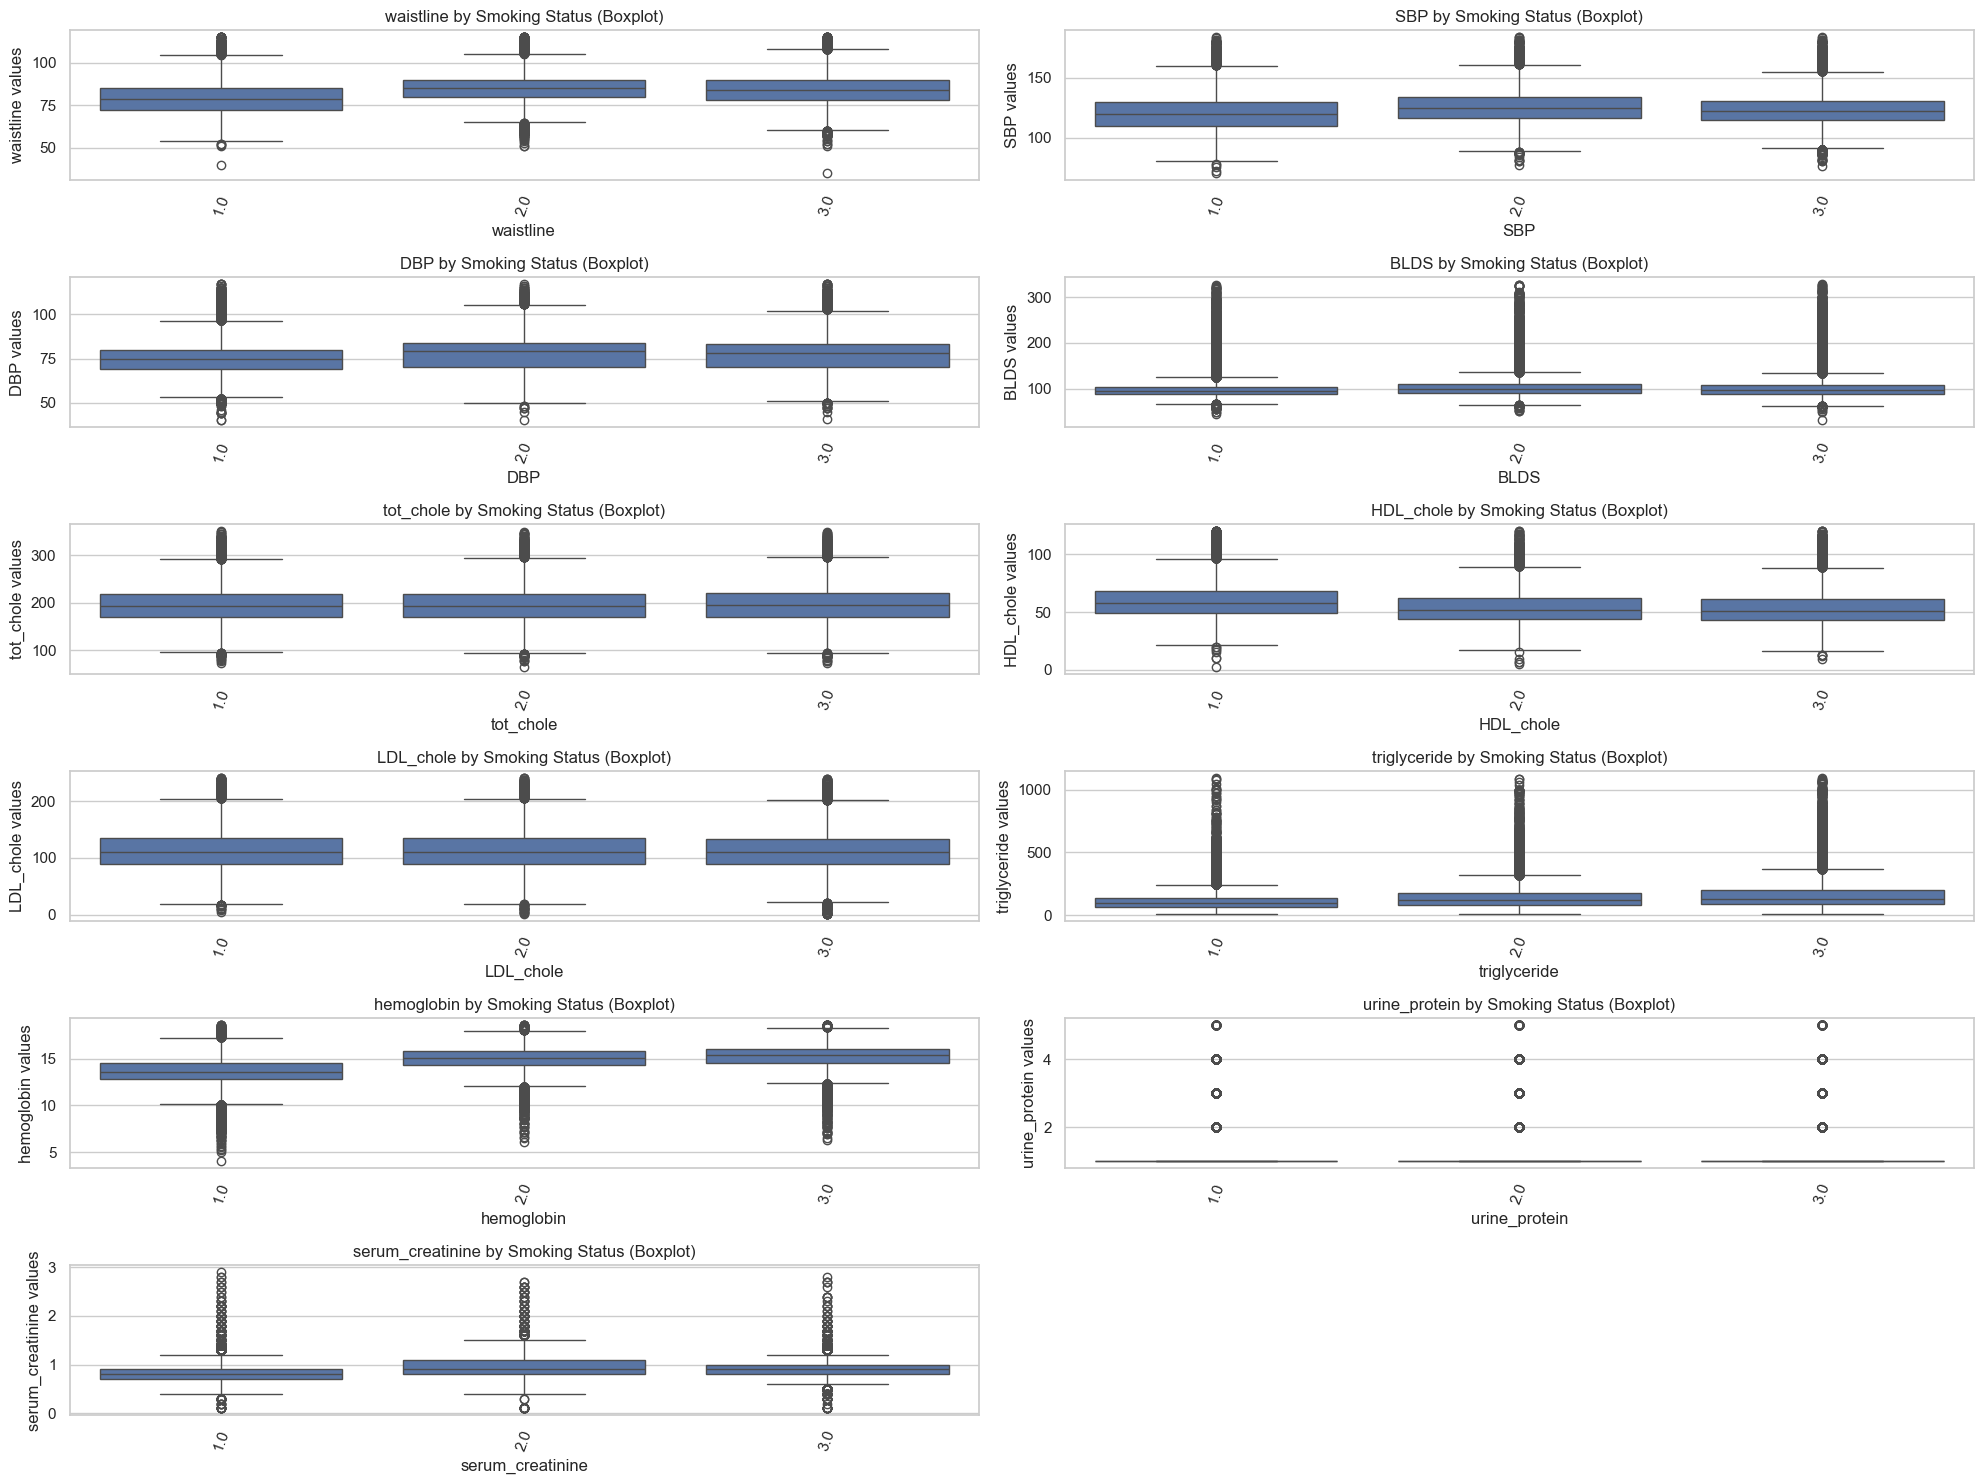

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

for idx, column in enumerate(['waistline', 'SBP', 'DBP', 'BLDS',
                              'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
                              'urine_protein', 'serum_creatinine'], start=1):
    print(f'Plotting {idx}...')

    number = 0.999
    number_of_item_greater_than_percentile = data[column].quantile(number)
    print(
        f'Number of item greater than {number} percentile: {number_of_item_greater_than_percentile}')
    count_greater_than = (
        data[column] > number_of_item_greater_than_percentile).sum()
    print(
        f'Number of values greater than {number_of_item_greater_than_percentile} in DBP: {count_greater_than}')

    mask = data[column] > number_of_item_greater_than_percentile
    data = data[~mask]
    removed_rows = mask.sum()
    print(f'Number of rows removed: {removed_rows}')

    print("Number of unique values : ", len(data[column].unique()))
    
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['waistline', 'SBP', 'DBP', 'BLDS',
                              'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
                              'urine_protein', 'serum_creatinine'], start=1):
    plt.subplot(6, 2, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel(f'{column} values')
    plt.title(f'{column} by Smoking Status (Boxplot)')  

plt.tight_layout()
plt.show()

* Feature : urine_protein is also single class dominated, no variability with target_class
* Hence, I choose to drop this column

In [355]:
data.drop(['urine_protein'], axis=1, inplace=True)

#### ANALYZING, SGOT_AST,	SGOT_ALT and gamma_GTP

Plotting 1...
Number of item greater than 0.999 percentile: 213.0
Number of values greater than 213.0 in DBP: 631
Number of rows removed: 631
Number of unique values :  213
Plotting 2...
Number of item greater than 0.999 percentile: 207.0
Number of values greater than 207.0 in DBP: 623
Number of rows removed: 623
Number of unique values :  207
Plotting 3...
Number of item greater than 0.999 percentile: 673.0
Number of values greater than 673.0 in DBP: 631
Number of rows removed: 631
Number of unique values :  671
Plotting 1...
Plotting 2...
Plotting 3...


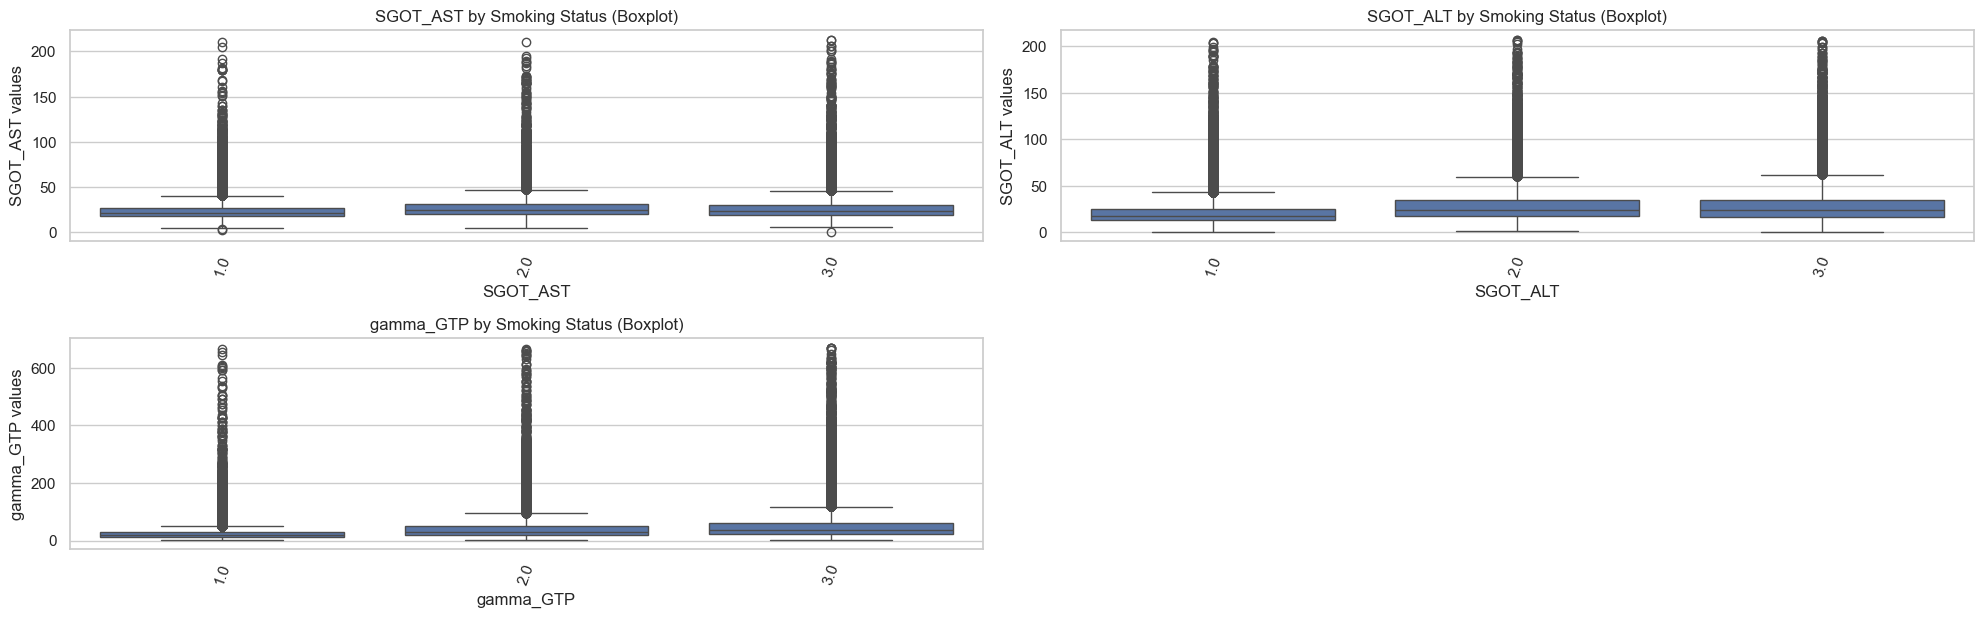

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

for idx, column in enumerate(["SGOT_AST",	"SGOT_ALT", "gamma_GTP"], start=1):
    print(f'Plotting {idx}...')
    
    number = 0.999
    number_of_item_greater_than_percentile = data[column].quantile(number)
    print(f'Number of item greater than {number} percentile: {number_of_item_greater_than_percentile}')
    count_greater_than = (data[column] > number_of_item_greater_than_percentile).sum()
    print(
        f'Number of values greater than {number_of_item_greater_than_percentile} in DBP: {count_greater_than}')

    mask = data[column] > number_of_item_greater_than_percentile
    data = data[~mask]
    removed_rows = mask.sum()
    print(f'Number of rows removed: {removed_rows}')
    
    print("Number of unique values : ", len(data[column].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(["SGOT_AST",	"SGOT_ALT", "gamma_GTP"], start=1):
    print(f'Plotting {idx}...')
    
    plt.subplot(5, 2, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel(f'{column} values')
    plt.title(f'{column} by Smoking Status (Boxplot)')

plt.tight_layout()
plt.show()

### Mean, Std Dev and Median

In [358]:
for idx, column in enumerate(['sex', 'age', 'height', 'weight','waistline', 'sight_left', 'sight_right','SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine','SGOT_AST', 'SGOT_ALT', 'gamma_GTP'], start=1):
    print(idx, " ###########################################################################")
    if current_y_is_smoking_or_drinking == 'SMK_stat_type_cd':
        for smoking_status in [1, 2, 3]:
            subset_data = data[column][is_smoking == smoking_status]
            print(f"Column: {column}, Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")
    else:
        for drinking_status in [1, 0]:
            subset_data = data[column][is_drinking == drinking_status]
            print(f"Column: {column}, Subset {drinking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")

1  ###########################################################################
Column: sex, Subset 1 - Mean: 0.2727, Std Dev: 0.4453, Median: 0.0000
Column: sex, Subset 2 - Mean: 0.9374, Std Dev: 0.2422, Median: 1.0000
Column: sex, Subset 3 - Mean: 0.9238, Std Dev: 0.2653, Median: 1.0000
2  ###########################################################################
Column: age, Subset 1 - Mean: 48.3987, Std Dev: 14.8274, Median: 50.0000
Column: age, Subset 2 - Mean: 50.1036, Std Dev: 12.9968, Median: 50.0000
Column: age, Subset 3 - Mean: 43.1901, Std Dev: 12.1703, Median: 40.0000
3  ###########################################################################
Column: height, Subset 1 - Mean: 158.5820, Std Dev: 8.6762, Median: 160.0000
Column: height, Subset 2 - Mean: 167.3831, Std Dev: 6.8655, Median: 170.0000
Column: height, Subset 3 - Mean: 168.3642, Std Dev: 7.1582, Median: 170.0000
4  ###########################################################################
Column: weight, Subset 1

### Heatmap

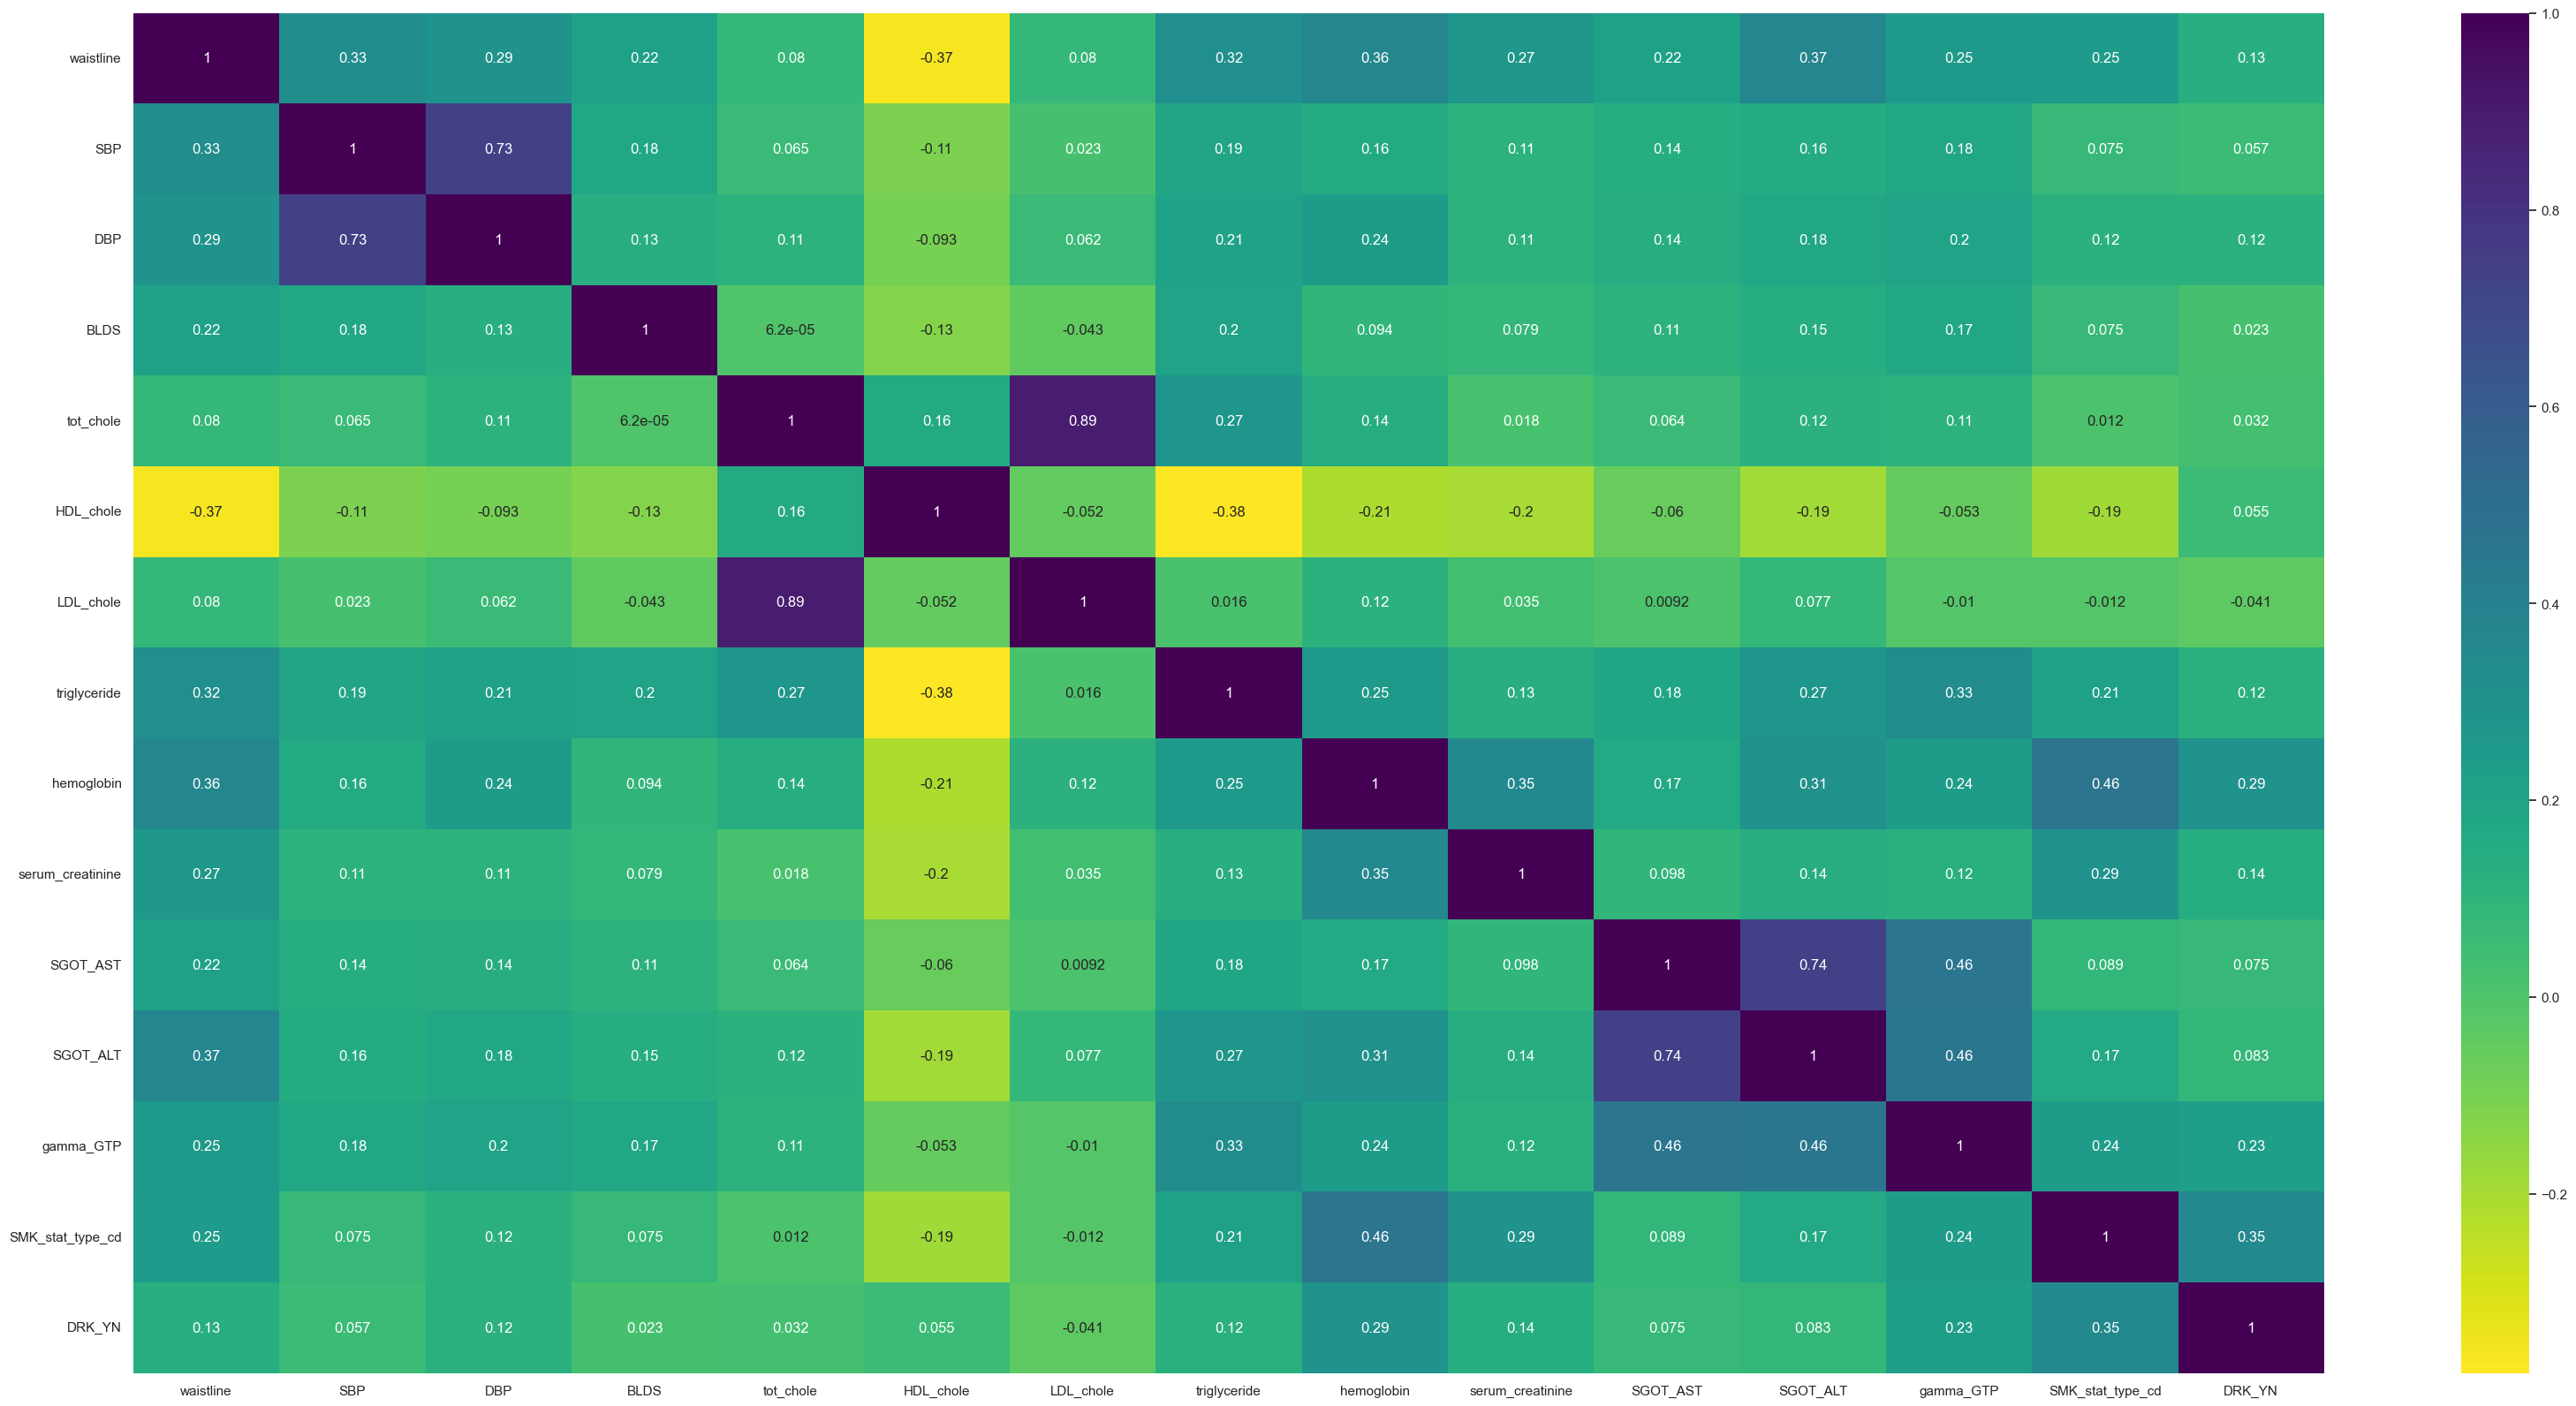

In [362]:
def heatmap():
    plt.figure(figsize=(40, 20))
    sns.heatmap(data.loc[:,numerical_features].corr(), annot=True, cmap='viridis_r')
    plt.show()
heatmap()

### Dimensionality Reduction

In [374]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [375]:
from sklearn.decomposition import PCA
def workinginpca(data , n_components=1):
    pca = PCA(n_components)

    pca_result = pca.fit_transform(data)

    # Calculate the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Display the result
    print(f"workinginpca :\n\t\tExplained Variance Ratio: {explained_variance_ratio[0]:.2f}")

    # Check how much data is lost
    data_loss = 1 - explained_variance_ratio[0]
    print(f"\t\tData Lost: {data_loss:.2%}")

In [376]:
from sklearn.decomposition import TruncatedSVD
def workinginsvd(data,n_components=1):
    svd = TruncatedSVD(n_components)

    transformed_data =  svd.fit_transform(data)

    # Calculate the explained variance ratio
    explained_variance_ratio = svd.explained_variance_ratio_

    print(f"workinginsvd :\n\t\tExplained Variance Ratio: {explained_variance_ratio[0]:.2%}")

    # Check how much data is lost
    data_lost = 1 - explained_variance_ratio[0]
    print(f"\t\tData Lost: {data_lost:.2%}")

In [377]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def workinginlda(data , target ,n_components=1):
    lda = LinearDiscriminantAnalysis(n_components = n_components , solver='eigen')
    X_lda = lda.fit_transform(data, target)

    # Calculate the explained variance ratio
    explained_variance_ratio = lda.explained_variance_ratio_

    # Calculate the proportion of data retained
    data_retained = np.sum(explained_variance_ratio)

    print(f"workinginlda :\n\t\tExplained Variance Ratio: {explained_variance_ratio[0]:.2f}")

    # Check how much data is lost
    data_lost = 1 - explained_variance_ratio[0]

    print(f"\t\tProportion of Data Retained: {data_retained:.2%}")
    print(f"\t\tProportion of Data lost: {data_lost:.2%}")

As there are approx. 1M data-points, but just 21~22 features.

* So, dropping columns at the cost of 1~2% data-lost can leave us with very few column.
* So, I decide to drop columns when cost of data-lost is below 0.5%

#### Working in 'height', 'weight', 'waistline'

In [378]:
workinginpca(data[['height', 'weight', 'waistline']] ,2)
workinginsvd(data[['height', 'weight', 'waistline']] ,2)
workinginlda(data[['height', 'weight', 'waistline']], data[current_y_is_smoking_or_drinking] ,2)

workinginpca :
		Explained Variance Ratio: 0.79
		Data Lost: 21.21%
workinginsvd :
		Explained Variance Ratio: 55.43%
		Data Lost: 44.57%
workinginlda :
		Explained Variance Ratio: 0.98
		Proportion of Data Retained: 100.00%
		Proportion of Data lost: 1.72%


#### working 'sight_left', 'sight_right'

In [379]:
workinginpca(data[['sight_left', 'sight_right']])
workinginsvd(data[['sight_left', 'sight_right']])
workinginlda(data[['sight_left', 'sight_right']], data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.65
		Data Lost: 35.32%
workinginsvd :
		Explained Variance Ratio: 64.67%
		Data Lost: 35.33%
workinginlda :
		Explained Variance Ratio: 1.00
		Proportion of Data Retained: 99.97%
		Proportion of Data lost: 0.03%


I decide to replace the above columns with their LDA counter-part

In [380]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_sight_l_r'] = lda.fit_transform(data[['sight_left', 'sight_right']], data[current_y_is_smoking_or_drinking])

data.drop(['sight_left', 'sight_right'], axis=1, inplace=True)
data.head(2)

,sex,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,LDA_combined_sight_l_r
0,0,55,160,50,75.0,121.0,81.0,100.0,243.0,62.0,160.0,100.0,14.1,0.6,15.0,17.0,25.0,1.0,0,-0.516863
1,0,55,145,40,69.0,110.0,80.0,94.0,194.0,62.0,104.0,140.0,14.3,0.6,23.0,19.0,17.0,1.0,0,0.001422


#### working in SBP AND BLDS


In [381]:
workinginpca(data[['SBP', 'BLDS']])
workinginsvd(data[['SBP', 'BLDS']])
workinginlda(data[['SBP', 'BLDS']], data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.75
		Data Lost: 25.31%
workinginsvd :
		Explained Variance Ratio: 53.49%
		Data Lost: 46.51%
workinginlda :
		Explained Variance Ratio: 0.99
		Proportion of Data Retained: 99.05%
		Proportion of Data lost: 0.95%


#### working in tot_chole, LDL_chole

In [382]:
workinginpca(data[['tot_chole', 'LDL_chole']])
workinginsvd(data[['tot_chole', 'LDL_chole']])
workinginlda(data[['tot_chole', 'LDL_chole']], data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.95
		Data Lost: 5.39%
workinginsvd :
		Explained Variance Ratio: 91.08%
		Data Lost: 8.92%
workinginlda :
		Explained Variance Ratio: 0.99
		Proportion of Data Retained: 99.33%
		Proportion of Data lost: 0.67%


Deciding to choose the lda replacement of ['tot_chole', 'LDL_chole']

In [383]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_tot_chole_LDL_chole'] = lda.fit_transform(data[['tot_chole', 'LDL_chole']], data[current_y_is_smoking_or_drinking])

data.drop(['tot_chole', 'LDL_chole'], axis=1, inplace=True)
data.head(2)

,sex,age,height,weight,waistline,SBP,DBP,BLDS,HDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,LDA_combined_sight_l_r,LDA_combined_tot_chole_LDL_chole
0,0,55,160,50,75.0,121.0,81.0,100.0,62.0,100.0,14.1,0.6,15.0,17.0,25.0,1.0,0,-0.516863,-0.190861
1,0,55,145,40,69.0,110.0,80.0,94.0,62.0,140.0,14.3,0.6,23.0,19.0,17.0,1.0,0,0.001422,0.470472


#### working in SGOT_AST and SGOT_ALT

In [384]:
workinginpca(data[['SGOT_AST', 'SGOT_ALT']])
workinginsvd(data[['SGOT_AST', 'SGOT_ALT']])
workinginlda(data[['SGOT_AST', 'SGOT_ALT']], data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.89
		Data Lost: 10.79%
workinginsvd :
		Explained Variance Ratio: 86.39%
		Data Lost: 13.61%
workinginlda :
		Explained Variance Ratio: 0.96
		Proportion of Data Retained: 96.09%
		Proportion of Data lost: 3.91%


In [385]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_SGOT_AST_SGOT_ALT'] = lda.fit_transform(data[['SGOT_AST', 'SGOT_ALT']], data[current_y_is_smoking_or_drinking])

data.drop(['SGOT_AST', 'SGOT_ALT'], axis=1, inplace=True)
data.head(2)

,sex,age,height,weight,waistline,SBP,DBP,BLDS,HDL_chole,triglyceride,hemoglobin,serum_creatinine,gamma_GTP,SMK_stat_type_cd,DRK_YN,LDA_combined_sight_l_r,LDA_combined_tot_chole_LDL_chole,LDA_combined_SGOT_AST_SGOT_ALT
0,0,55,160,50,75.0,121.0,81.0,100.0,62.0,100.0,14.1,0.6,25.0,1.0,0,-0.516863,-0.190861,-0.358926
1,0,55,145,40,69.0,110.0,80.0,94.0,62.0,140.0,14.3,0.6,17.0,1.0,0,0.001422,0.470472,-0.424207


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630517 entries, 0 to 638904
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   sex                               630517 non-null  int64  
 1   age                               630517 non-null  int64  
 2   height                            630517 non-null  int64  
 3   weight                            630517 non-null  int64  
 4   waistline                         630517 non-null  float64
 5   SBP                               630517 non-null  float64
 6   DBP                               630517 non-null  float64
 7   BLDS                              630517 non-null  float64
 8   HDL_chole                         630517 non-null  float64
 9   triglyceride                      630517 non-null  float64
 10  hemoglobin                        630517 non-null  float64
 11  serum_creatinine                  630517 non-null  float6

### Imports

In [387]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf


### Splitting and Scaling Data

In [388]:
new_data = data.copy().sample(n=100000)
X = new_data.drop(['SMK_stat_type_cd', 'DRK_YN'], axis=1)
y = new_data[current_y_is_smoking_or_drinking]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model

In [389]:
logreg_model = LogisticRegression(random_state=42)

logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)
logreg_pred_train = logreg_model.predict(X_train)


print("Logistic Regression:")

print("Accuracy:", accuracy_score(y_test, logreg_predictions))

print("Classification Report:\n", classification_report(y_test, logreg_predictions))
print("confusion_matrix:\n", confusion_matrix(y_test, logreg_predictions))

Logistic Regression:
Accuracy: 0.6482
Classification Report:
               precision    recall  f1-score   support

         1.0       0.87      0.72      0.79      7834
         2.0       0.51      0.50      0.51      5485
         3.0       0.56      0.69      0.62      6681

    accuracy                           0.65     20000
   macro avg       0.65      0.63      0.64     20000
weighted avg       0.67      0.65      0.65     20000

confusion_matrix:
 [[5650  975 1209]
 [ 318 2727 2440]
 [ 499 1595 4587]]


In [390]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))
print("confusion_matrix:\n", confusion_matrix(y_test, nb_predictions))


Naive Bayes:
Accuracy: 0.61915
Classification Report:
               precision    recall  f1-score   support

         1.0       0.77      0.74      0.76      7834
         2.0       0.49      0.53      0.51      5485
         3.0       0.56      0.55      0.55      6681

    accuracy                           0.62     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.62      0.62      0.62     20000

confusion_matrix:
 [[5827  963 1044]
 [ 758 2900 1827]
 [ 964 2061 3656]]


1. Simple
- Logistic Regression:
Accuracy: 0.6520003150102378
- Naive Bayes:
Accuracy: 0.6153488738383998
- ANN 
Test Accuracy: 0.3923531174659729

2. LDA
- Logistic Regression:
Accuracy: 0.6515301712173961
- Naive Bayes:
Accuracy: 0.62956295550251
- ANN: Test Accuracy: 0.3922218680381775

### Tensorflow models

In [391]:
X.shape

(100000, 16)

In [392]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array([y_train]).reshape(-1, 1))
print(enc.categories_)
y_train = enc.transform(np.array([y_train]).reshape(-1, 1)).toarray()
y_test = enc.transform(np.array([y_test]).reshape(-1, 1)).toarray()
X_train.shape, y_train.shape , X_test.shape , y_test.shape

[array([1., 2., 3.])]


((80000, 16), (80000, 3), (20000, 16), (20000, 3))

In [393]:
activation1 = 'relu'
activation2 = 'sigmoid'

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=activation1, input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation=activation1),
    tf.keras.layers.Dense(64, activation=activation1),
    tf.keras.layers.Dense(128, activation=activation1),
    tf.keras.layers.Dense(256, activation=activation1),
    tf.keras.layers.Dense(128, activation=activation1),
    tf.keras.layers.Dense(64, activation=activation1),
    tf.keras.layers.Dense(32, activation=activation1),
    tf.keras.layers.Dense(16, activation=activation1),
    tf.keras.layers.Dense(3, activation=activation2),
    # tf.keras.layers.Dense(1, activation=activation2),
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)
cce = tf.keras.losses.CategoricalCrossentropy(
                    from_logits=True,
                    reduction="auto",
                    name="categorical_crossentropy",
                )

model.compile(optimizer=optimizer,
              loss=cce, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=128,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
# 0.6498000025749207 , 0.6503999829292297 ,  0.6521499752998352 ,  0.6441500186920166 ,0.6474499702453613

Epoch 1/30
625/625 [==============================] - 7s 6ms/step - loss: 0.8120 - accuracy: 0.6431 - val_loss: 0.8027 - val_accuracy: 0.6510
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.7942 - accuracy: 0.6543 - val_loss: 0.7879 - val_accuracy: 0.6527
Epoch 3/30
625/625 [==============================] - 2s 4ms/step - loss: 0.7882 - accuracy: 0.6566 - val_loss: 0.7877 - val_accuracy: 0.6535
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 0.7837 - accuracy: 0.6560 - val_loss: 0.7944 - val_accuracy: 0.6532
Epoch 5/30
625/625 [==============================] - 2s 4ms/step - loss: 0.7822 - accuracy: 0.6564 - val_loss: 0.7819 - val_accuracy: 0.6554
Epoch 6/30
625/625 [==============================] - 2s 4ms/step - loss: 0.7805 - accuracy: 0.6565 - val_loss: 0.7861 - val_accuracy: 0.6521
Epoch 7/30
625/625 [==============================] - 2s 4ms/step - loss: 0.7801 - accuracy: 0.6570 - val_loss: 0.7873 - val_accuracy: 0.6471
Epoch 

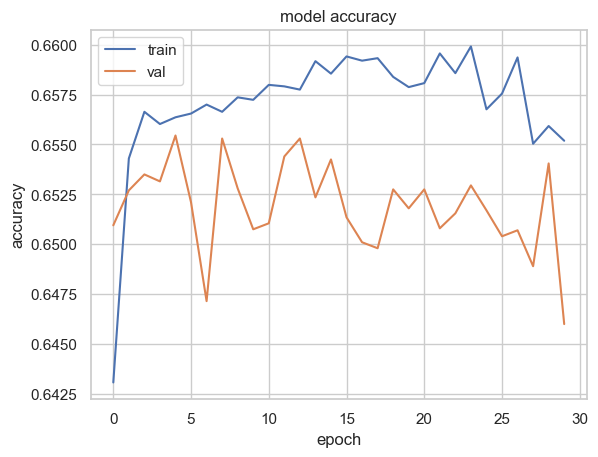

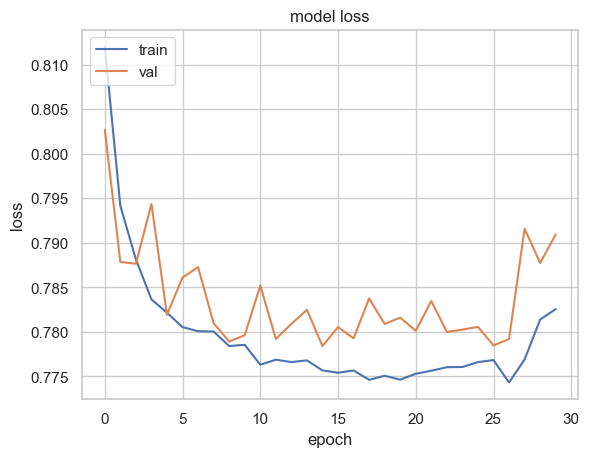

In [394]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()


In [395]:
y_predicted_labels = model.predict(X_test)
print(y_predicted_labels[0:2])

predicted_labels = (y_predicted_labels)

print(predicted_labels[0:8])

625/625 [==============================] - 1s 1ms/step
[[0.8046256  0.19242737 0.311369  ]
 [0.3901291  0.61835396 0.49073014]]
[[0.8046256  0.19242737 0.311369  ]
 [0.3901291  0.61835396 0.49073014]
 [0.3901291  0.61835396 0.49073014]
 [0.3901291  0.61835396 0.49073014]
 [0.81469756 0.18335569 0.28869802]
 [0.3901291  0.61835396 0.49073014]
 [0.3901291  0.61835396 0.49073014]
 [0.8211087  0.1775647  0.27431613]]


In [396]:
y_true = np.argmax(y_test , axis =1)
y_pred = np.argmax(predicted_labels , axis =1)


In [397]:
cm = tf.math.confusion_matrix(labels=y_true,predictions=y_pred)
print(cm)

tf.Tensor(
[[5687 1261  886]
 [ 338 3386 1761]
 [ 520 2314 3847]], shape=(3, 3), dtype=int32)
